In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

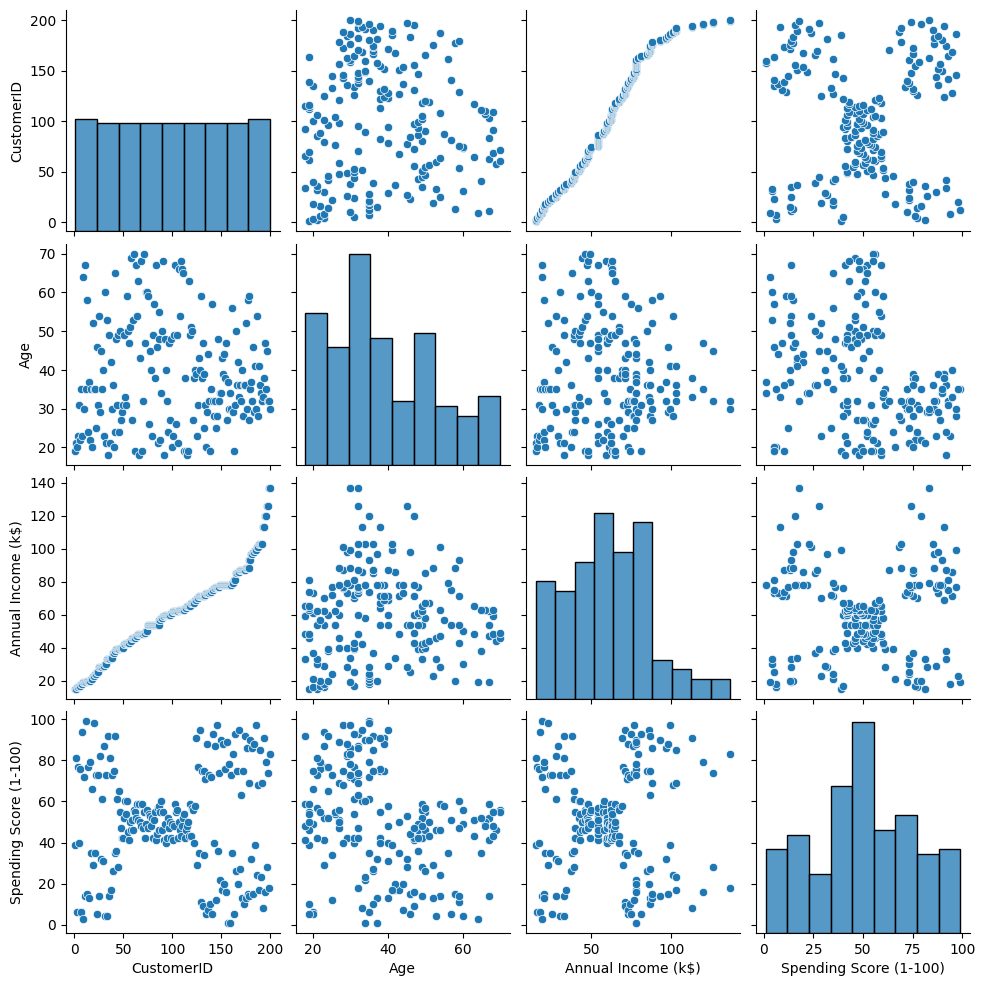

In [5]:
sns.pairplot(data=dataset)
plt.show()

In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [8]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X)
    wcss.append(km.inertia_)

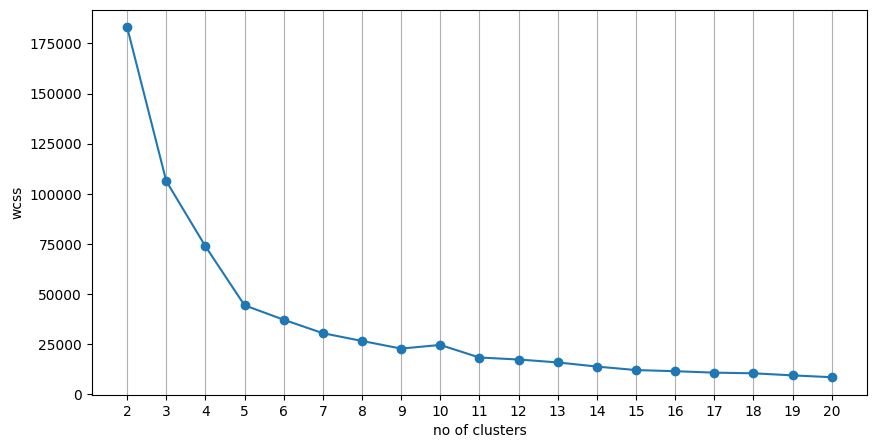

In [9]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss, marker="o")
plt.xlabel("no of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis ='x')
plt.show()

In [10]:
kmean = KMeans(n_clusters=5, init='k-means++')
kmean.fit(X)

KMeans(n_clusters=5)

In [11]:
dataset['pred'] = kmean.predict(X)

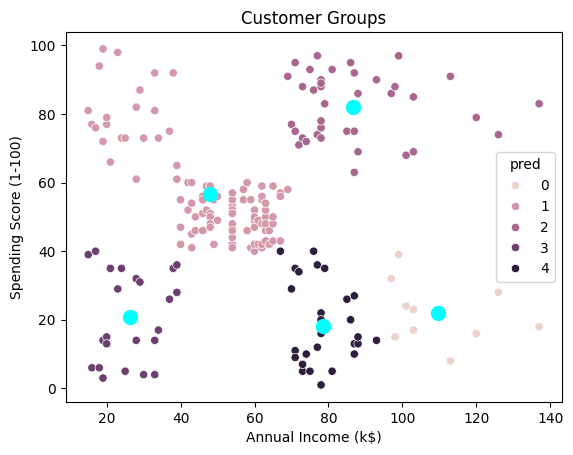

In [12]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dataset, hue='pred')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100, c='cyan')
plt.title("Customer Groups")
plt.show()